Created 'economic_data.csv' with shape: (15, 6)


,Region,Average_Income,Employment_Rate,Literacy_Rate,Population_Density,Urbanization_Rate
0,Region_1,45000,0.75,0.82,900,0.68
1,Region_2,52000,0.80,0.88,1100,0.72
2,Region_3,31000,0.65,0.70,650,0.55
3,Region_4,28000,0.60,0.66,500,0.48
4,Region_5,60000,0.85,0.91,1200,0.76



Missing values per column:
Region                0
Average_Income        0
Employment_Rate       0
Literacy_Rate         0
Population_Density    0
Urbanization_Rate     0
dtype: int64

Numeric columns used for analysis: ['Average_Income', 'Employment_Rate', 'Literacy_Rate', 'Population_Density', 'Urbanization_Rate']

Cluster counts:
 Cluster
1    6
0    6
2    3
Name: count, dtype: int64


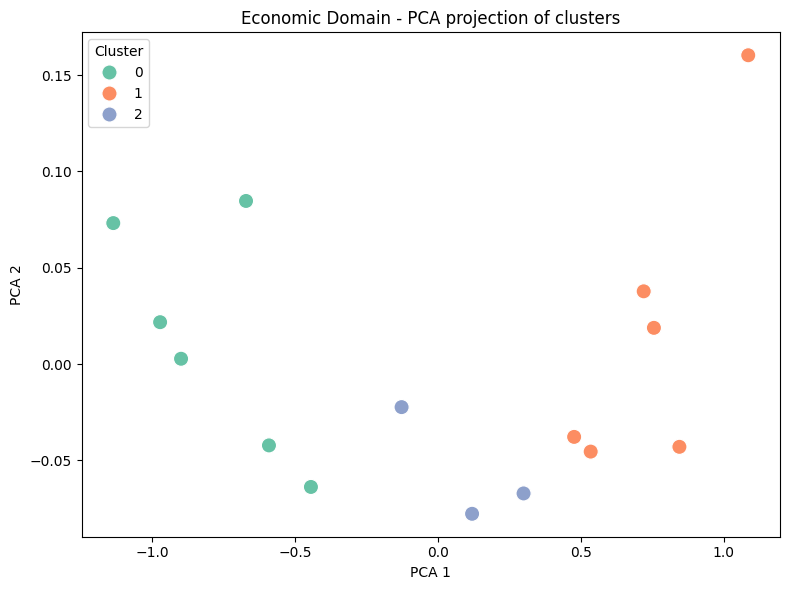

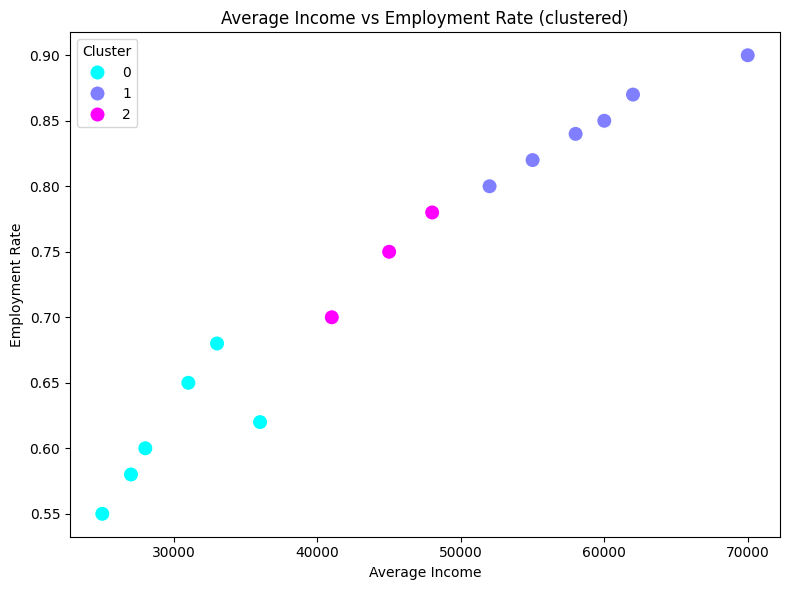

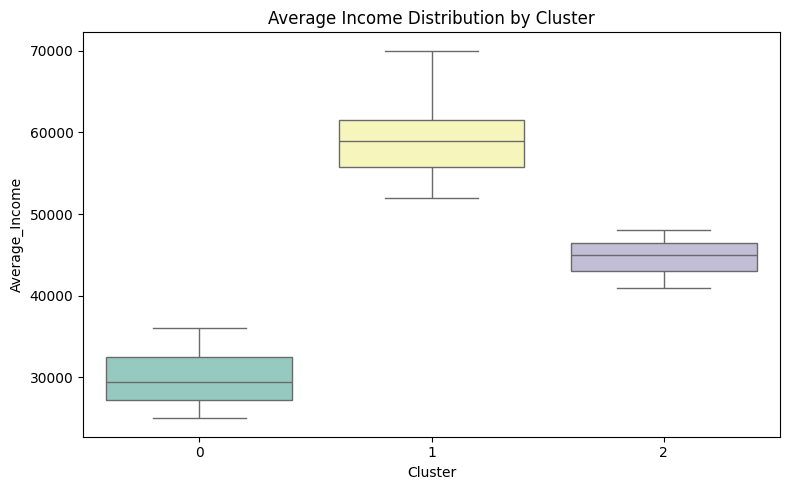


Cluster Summary (mean values):
          Average_Income  Employment_Rate  Literacy_Rate  Urbanization_Rate
Cluster                                                                   
0          30000.000000         0.613333       0.663333           0.513333
1          59500.000000         0.846667       0.908333           0.756667
2          44666.666667         0.743333       0.810000           0.676667

Cluster 0 -> AvgIncome: 30000, Employment: 0.61, Literacy: 0.66
  Interpretation: Lower-income region; policy support recommended.

Cluster 1 -> AvgIncome: 59500, Employment: 0.85, Literacy: 0.91
  Interpretation: High-income, highly urbanized region.

Cluster 2 -> AvgIncome: 44667, Employment: 0.74, Literacy: 0.81
  Interpretation: Moderate income, stable employment.

Saved 'economic_clustered_results.csv'.


In [7]:
# ECONOMIC DOMAIN (robust, Colab-ready)
# Author: Riddhima Mathur
# Creates synthetic econ dataset -> cleans -> clusters -> PCA -> visualizes -> saves results

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# -------------------------
# STEP 0: (optional) install libs in Colab if missing
# -------------------------
# !pip install -q scikit-learn seaborn

# -------------------------
# STEP 1: Create / Load dataset
# -------------------------
data = {
    "Region": [f"Region_{i}" for i in range(1, 16)],
    "Average_Income": [45000, 52000, 31000, 28000, 60000, 70000, 48000, 33000, 25000, 55000, 62000, 41000, 36000, 58000, 27000],
    "Employment_Rate": [0.75, 0.80, 0.65, 0.60, 0.85, 0.90, 0.78, 0.68, 0.55, 0.82, 0.87, 0.70, 0.62, 0.84, 0.58],
    "Literacy_Rate": [0.82, 0.88, 0.70, 0.66, 0.91, 0.93, 0.85, 0.72, 0.60, 0.89, 0.94, 0.76, 0.68, 0.90, 0.62],
    "Population_Density": [900, 1100, 650, 500, 1200, 1400, 1000, 700, 450, 1050, 1150, 850, 600, 1250, 480],
    "Urbanization_Rate": [0.68, 0.72, 0.55, 0.48, 0.76, 0.80, 0.70, 0.58, 0.45, 0.73, 0.78, 0.65, 0.52, 0.75, 0.50]
}
econ = pd.DataFrame(data)
econ.to_csv("economic_data.csv", index=False)
print("Created 'economic_data.csv' with shape:", econ.shape)
display(econ.head())

# -------------------------
# STEP 2: Data cleaning and numeric selection
# -------------------------
# Check missing values
print("\nMissing values per column:")
print(econ.isnull().sum())

# If there were missing values, fill only numeric columns with means
numeric_cols = econ.select_dtypes(include=[np.number]).columns.tolist()
econ[numeric_cols] = econ[numeric_cols].fillna(econ[numeric_cols].mean())

# Confirm types
print("\nNumeric columns used for analysis:", numeric_cols)

# -------------------------
# STEP 3: Feature matrix for clustering (numeric only)
# -------------------------
X = econ[numeric_cols].copy()  # DataFrame with numeric columns

# Extra safety: ensure no infinite or NaN values remain
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.mean())

# -------------------------
# STEP 4: Normalization
# -------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # returns numpy array

# -------------------------
# STEP 5: K-Means clustering (robust settings)
# -------------------------
# Choose k=3 by default. If you want to compute elbow, see commented code below.
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
econ["Cluster"] = kmeans.fit_predict(X_scaled)
print("\nCluster counts:\n", econ["Cluster"].value_counts())

# -------------------------
# Optional: Elbow method to choose k (uncomment to run)
# -------------------------
# import matplotlib.pyplot as plt
# sse = []
# K_range = range(1,7)
# for kk in K_range:
#     km = KMeans(n_clusters=kk, random_state=42, n_init=10)
#     km.fit(X_scaled)
#     sse.append(km.inertia_)
# plt.plot(K_range, sse, '-o')
# plt.xlabel('k'); plt.ylabel('SSE'); plt.title('Elbow Method for k'); plt.show()

# -------------------------
# STEP 6: PCA for 2D visualization
# -------------------------
pca = PCA(n_components=2, random_state=42)
pca_coords = pca.fit_transform(X_scaled)
econ["PCA1"], econ["PCA2"] = pca_coords[:,0], pca_coords[:,1]

# -------------------------
# STEP 7: Visualizations
# -------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=econ, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=120)
plt.title("Economic Domain - PCA projection of clusters")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=econ, x="Average_Income", y="Employment_Rate", hue="Cluster", palette="cool", s=120)
plt.title("Average Income vs Employment Rate (clustered)")
plt.xlabel("Average Income")
plt.ylabel("Employment Rate")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=econ, x="Cluster", y="Average_Income", palette="Set3")
plt.title("Average Income Distribution by Cluster")
plt.tight_layout()
plt.show()

# -------------------------
# STEP 8: Cluster summaries & interpretations
# -------------------------
cluster_summary = econ.groupby("Cluster")[["Average_Income","Employment_Rate","Literacy_Rate","Urbanization_Rate"]].mean()
print("\nCluster Summary (mean values):\n", cluster_summary)

for cid, row in cluster_summary.iterrows():
    print(f"\nCluster {cid} -> AvgIncome: {row['Average_Income']:.0f}, Employment: {row['Employment_Rate']:.2f}, Literacy: {row['Literacy_Rate']:.2f}")
    if row["Average_Income"] > 55000:
        print("  Interpretation: High-income, highly urbanized region.")
    elif row["Average_Income"] > 40000:
        print("  Interpretation: Moderate income, stable employment.")
    else:
        print("  Interpretation: Lower-income region; policy support recommended.")

# -------------------------
# STEP 9: Save results
# -------------------------
econ.to_csv("economic_clustered_results.csv", index=False)
print("\nSaved 'economic_clustered_results.csv'.")
